In [714]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

pd.options.mode.chained_assignment = None

In [715]:
train_data = pd.read_csv("Housing.csv")

In [716]:
X = train_data[['area', 'bathrooms', 'bedrooms']].to_numpy()
y = train_data['price'].to_numpy() / 1e6

In [717]:
# Function to determine the hypothesis of linear regression
def hypothesis(X, theta):
    return np.dot(X, theta)

In [718]:
# Loss function for linear regression (MSE)
def cost(X, y, theta):
    m = len(y)
    return (1 / (2 * m)) * np.sum((hypothesis(X, theta) - y) ** 2)

In [719]:
# Function for performing gradient descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        error = hypothesis(X, theta) - y
        theta -= (alpha / m) * np.dot(X.T, error)
        cost_history.append(cost(X, y, theta))

    return theta, cost_history

In [720]:
# Learning parameters
alpha = 0.0000000001
iterations = 1000
theta = np.zeros(X.shape[-1])

In [721]:
# Training the model
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

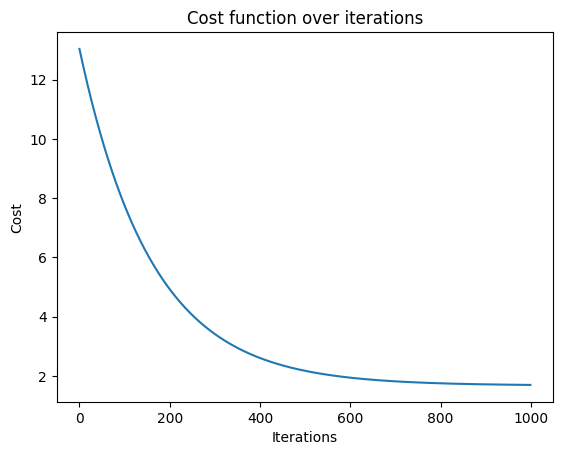

In [722]:
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function over iterations')
plt.show()

In [752]:
theta, cost_history[-1]

(array([8.01889386e-04, 2.48063945e-07, 5.37886304e-07]), 1.609780021527176)

In [724]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [725]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [726]:
theta, cost_history = gradient_descent(X_train, y_train, np.zeros(X_train.shape[1]), alpha, iterations)

In [727]:
y_pred = hypothesis(X_test, theta)

In [728]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")
theta_sklearn = theta

MSE: 4.30786307781305
R^2: 0.14772911091392127


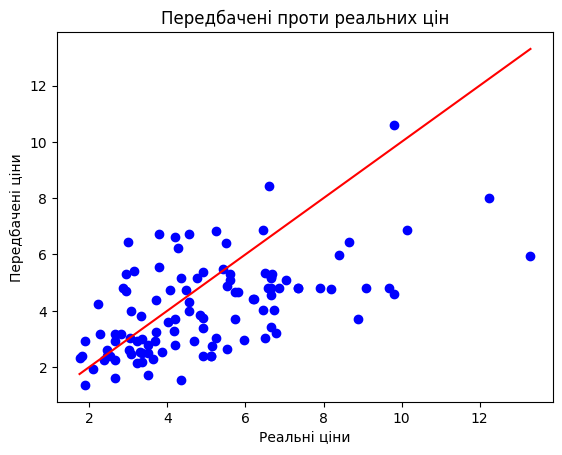

In [729]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Реальні ціни')
plt.ylabel('Передбачені ціни')
plt.title('Передбачені проти реальних цін')
plt.show()

In [741]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

intercept = lr_model.intercept_
coefficients = lr_model.coef_

theta_sklearn = np.hstack([intercept, coefficients])

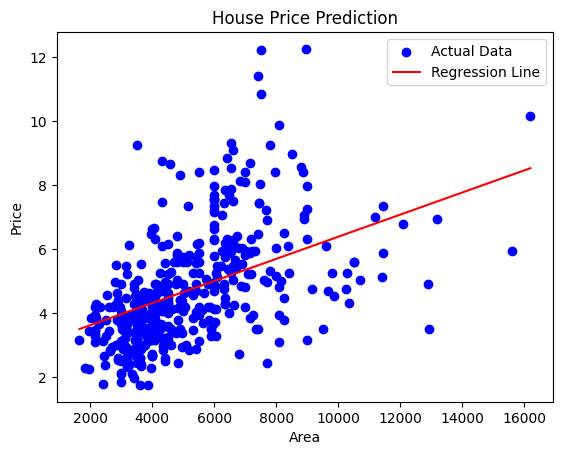

In [742]:
import numpy as np
import matplotlib.pyplot as plt

area_values = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)

other_features_mean = np.mean(X_train[:, 1:], axis=0)
predicted_prices = intercept + coefficients[0] * area_values

for i, mean_value in enumerate(other_features_mean, start=1):
    predicted_prices += coefficients[i] * mean_value

plt.scatter(X_train[:, 0], y_train, color='blue', label='Actual Data')
plt.plot(area_values, predicted_prices, color='red', label='Regression Line')

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('House Price Prediction')
plt.legend()
plt.show()

In [743]:
coefficients

array([3.45466570e-04, 1.42231966e+00, 3.60197650e-01])

In [744]:
theta

array([8.01889386e-04, 2.48063945e-07, 5.37886304e-07])

In [745]:
difference = np.array(coefficients) - np.array(theta)

print("Difference between the coefficients:", difference)

Difference between the coefficients: [-4.56422816e-04  1.42231941e+00  3.60197113e-01]


In [754]:
from numpy.linalg import inv

def normal_equation(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    
    theta_best = inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    
    return theta_best

X_b_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]

theta_best_analytical = normal_equation(X_train, y_train)
theta_best_analytical

array([5.94853792e-02, 3.45466570e-04, 1.42231966e+00, 3.60197650e-01])